## This python notebook computes mesozoo_loss_zint and mesozooC_zint from the CESM2-LE for regions of interest

In [1]:
import intake
import matplotlib.pyplot as plt
import xarray as xr
from distributed import Client
from ncar_jobqueue import NCARCluster
import dask
import numpy as np
from dask_jobqueue import PBSCluster
import esmlab

### Get some DASK going to speed up processing

In [2]:
# Setup your PBSCluster
cluster = PBSCluster(
    cores=2, # The number of cores you want
    memory='100 GB', # Amount of memory
    processes=1, # How many processes
    queue='casper', # The type of queue to utilize (/glade/u/apps/dav/opt/usr/bin/execcasper)
    local_directory='$TMPDIR', # Use your local directory
    resource_spec='select=1:ncpus=2:mem=100GB', # Specify resources
    project='NCGD0011', # Input your project ID here
    walltime='04:00:00', # Amount of wall time
    interface='ext', # Interface to use
)
# Scale up
cluster.scale(24)

# Change your url to the dask dashboard so you can see it
dask.config.set({'distributed.dashboard.link':'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status'})

# Setup your client
client = Client(cluster)

In [3]:
client

Client Scheduler: tcp://128.117.208.103:38543 Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/kristenk/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [4]:
variables = ['spC','diatC','diazC','zoo_loss_zint_100m','zooC']

In [5]:
catalog = intake.open_esm_datastore(
    '/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/glade-cesm2-le.json'
)

/glade/work/kristenk/miniconda/envs/analysis5/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (5,6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
catalog.df.experiment.unique()

array(['historical', 'ssp370'], dtype=object)

In [7]:
#cat.search(component='ocn').df.variable.unique()
catalog.search(component='ocn',variable=variables[0]).df

,component,stream,case,member_id,variable,start_time,end_time,time_range,long_name,units,vertical_levels,frequency,path,experiment,forcing_variant,cesm_member_id,control_branch_year,cmip_experiment_id
0,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,zoo_loss_zint_100m,1850-01,1859-12,185001-185912,"Zooplankton Loss Vertical Integral, 0-100m",mmol/m^3 cm/s,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
1,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,zoo_loss_zint_100m,1860-01,1869-12,186001-186912,"Zooplankton Loss Vertical Integral, 0-100m",mmol/m^3 cm/s,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
2,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,zoo_loss_zint_100m,1870-01,1879-12,187001-187912,"Zooplankton Loss Vertical Integral, 0-100m",mmol/m^3 cm/s,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
3,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,zoo_loss_zint_100m,1880-01,1889-12,188001-188912,"Zooplankton Loss Vertical Integral, 0-100m",mmol/m^3 cm/s,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
4,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,zoo_loss_zint_100m,1890-01,1899-12,189001-189912,"Zooplankton Loss Vertical Integral, 0-100m",mmol/m^3 cm/s,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,ocn,pop.h,b.e21.BSSP370smbb.f09_g17.LE2-1301.020,r20i1301p1f2,zoo_loss_zint_100m,2055-01,2064-12,205501-206412,"Zooplankton Loss Vertical Integral, 0-100m",mmol/m^3 cm/s,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,ssp370,smbb,1301.020,1301,CESM2_ssp370_r20i1301p1f2
2596,ocn,pop.h,b.e21.BSSP370smbb.f09_g17.LE2-1301.020,r20i1301p1f2,zoo_loss_zint_100m,2065-01,2074-12,206501-207412,"Zooplankton Loss Vertical Integral, 0-100m",mmol/m^3 cm/s,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,ssp370,smbb,1301.020,1301,CESM2_ssp370_r20i1301p1f2
2597,ocn,pop.h,b.e21.BSSP370smbb.f09_g17.LE2-1301.020,r20i1301p1f2,zoo_loss_zint_100m,2075-01,2084-12,207501-208412,"Zooplankton Loss Vertical Integral, 0-100m",mmol/m^3 cm/s,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,ssp370,smbb,1301.020,1301,CESM2_ssp370_r20i1301p1f2
2598,ocn,pop.h,b.e21.BSSP370smbb.f09_g17.LE2-1301.020,r20i1301p1f2,zoo_loss_zint_100m,2085-01,2094-12,208501-209412,"Zooplankton Loss Vertical Integral, 0-100m",mmol/m^3 cm/s,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,ssp370,smbb,1301.020,1301,CESM2_ssp370_r20i1301p1f2


### Get POP grid

In [11]:
import pop_tools

In [12]:
ds_grid = pop_tools.get_grid('POP_gx1v7')
lons=ds_grid.TLONG
lats=ds_grid.TLAT
area=ds_grid.TAREA
area_m=ds_grid.TAREA * 1e-4
dz = ds_grid.dz

### Go through each variable and put in tmp ds and then calculate mesozooC_zint_100m and mesozoo_loss_zint_100m

In [13]:
%%time
print('doing variable: ', var[0])
my_key = 'ocn.historical.pop.h.cmip6.' + var[0] ### zooC
ds_tmp = dsets[my_key]
#fix time dimension so it's a mean of the timebounds
ds_tmp['time']= ds_tmp.time_bound.compute().mean(dim="d2")
keep_vars=['z_t','z_t_150m','time_bound','dz','TLAT','TLONG','time'] + [var[0]]
ds_tmp = ds_tmp.drop([v for v in ds_tmp.variables if v not in keep_vars])
da = ds_tmp[var[0]]
# do depth integral here
tmp = (dz.isel(z_t=slice(0, 15)).rename({'z_t': 'z_t_150m'}) * da).sum('z_t_150m')
tmp.attrs['units'] = da.attrs['units'] + ' cm'
ds_tmp[var[0]] = tmp

doing variable:  zooC
CPU times: user 82.5 ms, sys: 3.89 ms, total: 86.4 ms
Wall time: 262 ms


In [14]:
%%time
print('doing variable: ', var[1])
my_key = 'ocn.historical.pop.h.cmip6.' + var[1] ### spC
ds_tmp2 = dsets[my_key]
#fix time dimension so it's a mean of the timebounds
ds_tmp2['time']= ds_tmp2.time_bound.compute().mean(dim="d2")
keep_vars=['z_t','z_t_150m','time_bound','dz','TLAT','TLONG','time'] + [var[1]]
ds_tmp2 = ds_tmp2.drop([v for v in ds_tmp2.variables if v not in keep_vars])
da = ds_tmp2[var[1]]
# do depth integral here
tmp = (dz.isel(z_t=slice(0, 15)).rename({'z_t': 'z_t_150m'}) * da).sum('z_t_150m')
tmp.attrs['units'] = da.attrs['units'] + ' cm'
ds_tmp2[var[1]] = tmp

doing variable:  spC
CPU times: user 85.6 ms, sys: 27 µs, total: 85.6 ms
Wall time: 213 ms


In [15]:
%%time
print('doing variable: ', var[2])
my_key = 'ocn.historical.pop.h.cmip6.' + var[2] ### diazC
ds_tmp3 = dsets[my_key]
#fix time dimension so it's a mean of the timebounds
ds_tmp3['time']= ds_tmp3.time_bound.compute().mean(dim="d2")
keep_vars=['z_t','z_t_150m','time_bound','dz','TLAT','TLONG','time'] + [var[2]]
ds_tmp3 = ds_tmp3.drop([v for v in ds_tmp3.variables if v not in keep_vars])

da = ds_tmp3[var[2]]
# do depth integral here
tmp = (dz.isel(z_t=slice(0, 15)).rename({'z_t': 'z_t_150m'}) * da).sum('z_t_150m')
tmp.attrs['units'] = da.attrs['units'] + ' cm'
ds_tmp3[var[2]] = tmp

doing variable:  diazC
CPU times: user 78.1 ms, sys: 3.85 ms, total: 81.9 ms
Wall time: 223 ms


In [16]:
%%time
print('doing variable: ', var[3])
my_key = 'ocn.historical.pop.h.cmip6.' + var[3] ### diazC
ds_tmp4 = dsets[my_key]
#fix time dimension so it's a mean of the timebounds
ds_tmp4['time']= ds_tmp4.time_bound.compute().mean(dim="d2")
keep_vars=['z_t','z_t_150m','time_bound','dz','TLAT','TLONG','time'] + [var[3]]
ds_tmp4 = ds_tmp4.drop([v for v in ds_tmp4.variables if v not in keep_vars])

da = ds_tmp4[var[3]]
# do depth integral here
tmp = (dz.isel(z_t=slice(0, 15)).rename({'z_t': 'z_t_150m'}) * da).sum('z_t_150m')
tmp.attrs['units'] = da.attrs['units'] + ' cm'
ds_tmp4[var[3]] = tmp

doing variable:  diatC
CPU times: user 68.1 ms, sys: 11.8 ms, total: 79.9 ms
Wall time: 167 ms


In [17]:
%%time
my_key = 'ocn.historical.pop.h.cmip6.' + var[4] ### zoo_loss_zint_100m
ds_tmp5 = dsets[my_key]
#fix time dimension so it's a mean of the timebounds
ds_tmp5['time']= ds_tmp5.time_bound.compute().mean(dim="d2")
keep_vars=['z_t','z_t_150m','time_bound','dz','TLAT','TLONG','time'] + [var[4]]
ds_tmp5 = ds_tmp5.drop([v for v in ds_tmp5.variables if v not in keep_vars]) #### already monthly!!!

CPU times: user 68.1 ms, sys: 4.26 ms, total: 72.4 ms
Wall time: 257 ms


In [18]:
ds_tmp['time'] = ds_tmp5.time
ds_tmp2['time'] = ds_tmp5.time
ds_tmp3['time'] = ds_tmp5.time
ds_tmp4['time'] = ds_tmp5.time

### calculate mesozoo parts

In [19]:
ds_hist = xr.Dataset()

ds_hist['mesozooC_zint_100m'] = ds_tmp.zooC * (ds_tmp4.diatC/(ds_tmp2.spC + ds_tmp4.diatC + ds_tmp3.diazC))

In [20]:
ds_hist['mesozoo_loss_zint_100m'] = ds_tmp5.zoo_loss_zint_100m * (ds_tmp4.diatC/(ds_tmp2.spC + ds_tmp4.diatC + ds_tmp3.diazC))

In [21]:
ds_hist.mesozooC_zint_100m.attrs = ds_tmp.zooC.attrs

In [22]:
ds_hist.mesozooC_zint_100m.attrs

{'units': 'mmol/m^3 cm', 'long_name': 'thickness of layer k'}

In [23]:
ds_hist.mesozoo_loss_zint_100m.attrs = ds_tmp5.zoo_loss_zint_100m.attrs

In [24]:
ds_hist.mesozoo_loss_zint_100m.attrs

{'long_name': 'Zooplankton Loss Vertical Integral, 0-100m',
 'units': 'mmol/m^3 cm/s',
 'grid_loc': '2110',
 'cell_methods': 'time: mean'}

#### future scenario part

In [25]:
subset = catalog.search(component='ocn',
                        variable=var,
                        experiment='ssp370', #'ssp370',
                        forcing_variant='cmip6',
                       )

In [26]:
with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    dsets = subset.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream.forcing_variant.variable'


In [27]:
dsets.keys()

dict_keys(['ocn.ssp370.pop.h.cmip6.diazC', 'ocn.ssp370.pop.h.cmip6.spC', 'ocn.ssp370.pop.h.cmip6.zoo_loss_zint_100m', 'ocn.ssp370.pop.h.cmip6.diatC', 'ocn.ssp370.pop.h.cmip6.zooC'])

In [28]:
%%time
print('doing variable: ', var[0])
my_key = 'ocn.ssp370.pop.h.cmip6.' + var[0] ### zooC
ds_tmp = dsets[my_key]
#fix time dimension so it's a mean of the timebounds
ds_tmp['time']= ds_tmp.time_bound.compute().mean(dim="d2")
keep_vars=['z_t','z_t_150m','time_bound','dz','TLAT','TLONG','time'] + [var[0]]
ds_tmp = ds_tmp.drop([v for v in ds_tmp.variables if v not in keep_vars])
da = ds_tmp[var[0]]
# do depth integral here
tmp = (dz.isel(z_t=slice(0, 15)).rename({'z_t': 'z_t_150m'}) * da).sum('z_t_150m')
tmp.attrs['units'] = da.attrs['units'] + ' cm'
ds_tmp[var[0]] = tmp

doing variable:  zooC
CPU times: user 54.8 ms, sys: 0 ns, total: 54.8 ms
Wall time: 171 ms


In [29]:
%%time
print('doing variable: ', var[1])
my_key = 'ocn.ssp370.pop.h.cmip6.' + var[1] ### spC
ds_tmp2 = dsets[my_key]
#fix time dimension so it's a mean of the timebounds
ds_tmp2['time']= ds_tmp2.time_bound.compute().mean(dim="d2")
keep_vars=['z_t','z_t_150m','time_bound','dz','TLAT','TLONG','time'] + [var[1]]
ds_tmp2 = ds_tmp2.drop([v for v in ds_tmp2.variables if v not in keep_vars])
da = ds_tmp2[var[1]]
# do depth integral here
tmp = (dz.isel(z_t=slice(0, 15)).rename({'z_t': 'z_t_150m'}) * da).sum('z_t_150m')
tmp.attrs['units'] = da.attrs['units'] + ' cm'
ds_tmp2[var[1]] = tmp

doing variable:  spC
CPU times: user 56 ms, sys: 4.45 ms, total: 60.5 ms
Wall time: 216 ms


In [30]:
%%time
print('doing variable: ', var[2])
my_key = 'ocn.ssp370.pop.h.cmip6.' + var[2] ### diazC
ds_tmp3 = dsets[my_key]
#fix time dimension so it's a mean of the timebounds
ds_tmp3['time']= ds_tmp3.time_bound.compute().mean(dim="d2")
keep_vars=['z_t','z_t_150m','time_bound','dz','TLAT','TLONG','time'] + [var[2]]
ds_tmp3 = ds_tmp3.drop([v for v in ds_tmp3.variables if v not in keep_vars])

da = ds_tmp3[var[2]]
# do depth integral here
tmp = (dz.isel(z_t=slice(0, 15)).rename({'z_t': 'z_t_150m'}) * da).sum('z_t_150m')
tmp.attrs['units'] = da.attrs['units'] + ' cm'
ds_tmp3[var[2]] = tmp

doing variable:  diazC
CPU times: user 57.1 ms, sys: 133 µs, total: 57.2 ms
Wall time: 206 ms


In [31]:
%%time
print('doing variable: ', var[3])
my_key = 'ocn.ssp370.pop.h.cmip6.' + var[3] ### diazC
ds_tmp4 = dsets[my_key]
#fix time dimension so it's a mean of the timebounds
ds_tmp4['time']= ds_tmp4.time_bound.compute().mean(dim="d2")
keep_vars=['z_t','z_t_150m','time_bound','dz','TLAT','TLONG','time'] + [var[3]]
ds_tmp4 = ds_tmp4.drop([v for v in ds_tmp4.variables if v not in keep_vars])

da = ds_tmp4[var[3]]
# do depth integral here
tmp = (dz.isel(z_t=slice(0, 15)).rename({'z_t': 'z_t_150m'}) * da).sum('z_t_150m')
tmp.attrs['units'] = da.attrs['units'] + ' cm'
ds_tmp4[var[3]] = tmp

doing variable:  diatC
CPU times: user 50.3 ms, sys: 4.19 ms, total: 54.5 ms
Wall time: 164 ms


In [32]:
%%time
my_key = 'ocn.ssp370.pop.h.cmip6.' + var[4] ### zoo_loss_zint_100m
ds_tmp5 = dsets[my_key]
#fix time dimension so it's a mean of the timebounds
ds_tmp5['time']= ds_tmp5.time_bound.compute().mean(dim="d2")
keep_vars=['z_t','z_t_150m','time_bound','dz','TLAT','TLONG','time'] + [var[4]]
ds_tmp5 = ds_tmp5.drop([v for v in ds_tmp5.variables if v not in keep_vars]) #### already monthly!!!

CPU times: user 44.9 ms, sys: 0 ns, total: 44.9 ms
Wall time: 221 ms


In [33]:
ds_tmp['time'] = ds_tmp5.time
ds_tmp2['time'] = ds_tmp5.time
ds_tmp3['time'] = ds_tmp5.time
ds_tmp4['time'] = ds_tmp5.time

### calculate mesozoo parts

In [34]:
ds_ssp = xr.Dataset()

ds_ssp['mesozooC_zint_100m'] = ds_tmp.zooC * (ds_tmp4.diatC/(ds_tmp2.spC + ds_tmp4.diatC + ds_tmp3.diazC))

ds_ssp['mesozoo_loss_zint_100m'] = ds_tmp5.zoo_loss_zint_100m * (ds_tmp4.diatC/(ds_tmp2.spC + ds_tmp4.diatC + ds_tmp3.diazC))

In [35]:
ds_ssp.mesozooC_zint_100m.attrs = ds_tmp.zooC.attrs

In [36]:
ds_ssp.mesozoo_loss_zint_100m.attrs = ds_tmp5.zoo_loss_zint_100m.attrs

### merge the historical ds and SSP ds

In [37]:
ds = xr.concat((ds_hist,ds_ssp),dim='time')

In [38]:
ds

,Array,Chunk
Bytes,137.88 GiB,112.50 MiB
Shape,"(50, 3012, 384, 320)","(1, 120, 384, 320)"
Count,63701 Tasks,1300 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,137.88 GiB,112.50 MiB
Shape,"(50, 3012, 384, 320)","(1, 120, 384, 320)"
Count,55901 Tasks,1300 Chunks
Type,float64,numpy.ndarray


### Create output dataset

In [39]:
ds['TLONG'] = ds_grid['TLONG']
ds['TLAT'] = ds_grid['TLAT']
ds['KMT'] = ds_grid['KMT']
ds['TAREA'] = ds_grid['TAREA']

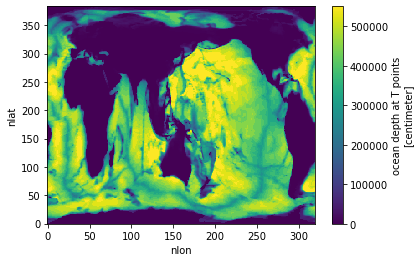

In [40]:
HT = xr.full_like(ds_grid.TAREA, fill_value=0.)
HT.attrs = dict(
    units='centimeter',
    long_name='ocean depth at T points',
    note='this field ignores overflows, which comprise isolated KMT pop-down points'
)
for j in range(len(ds_grid.nlat)):
    for i in range(len(ds_grid.nlon)):
        if ds_grid.KMT[j, i] > 0:
            k = int(ds_grid.KMT[j, i] - 1)
            HT.values[j, i] = ds_grid.z_w_bot[k]
            
HT.plot()

In [41]:
ds['HT'] = HT

In [42]:
ds

,Array,Chunk
Bytes,137.88 GiB,112.50 MiB
Shape,"(50, 3012, 384, 320)","(1, 120, 384, 320)"
Count,63701 Tasks,1300 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,137.88 GiB,112.50 MiB
Shape,"(50, 3012, 384, 320)","(1, 120, 384, 320)"
Count,55901 Tasks,1300 Chunks
Type,float64,numpy.ndarray


In [43]:
variables = ['mesozooC_zint_100m','mesozoo_loss_zint_100m']

In [44]:
%%time

for v in variables:
    
    dso = ds[['TLONG','TLAT','time','KMT','TAREA','HT',v]]
    
    file_out = '/glade/derecho/scratch/kristenk/CESM2-LE-FEISTY_prep/CESM2-LE_1850-2100_'+v+'.nc'
    dso.to_netcdf(file_out)

CPU times: user 5min, sys: 11.4 s, total: 5min 11s
Wall time: 38min 18s


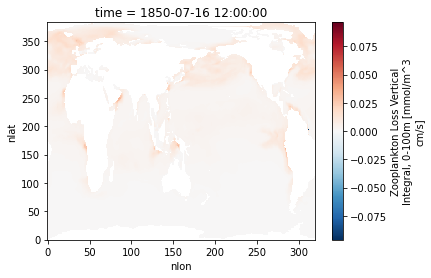

In [47]:
dso.mesozoo_loss_zint_100m.isel(member_id=0,time=6).plot()

In [48]:
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
concurrent.futures._base.CancelledError
